In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

In [82]:
import random
from sklearn.model_selection import train_test_split

In [ ]:
! pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow_addons as tfa
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving output.csv to output.csv
Saving input.csv to input.csv


In [84]:
X = pd.read_csv('input.csv')
Y = pd.read_csv('output.csv')
X = X.drop(X.columns[0], axis=1)
Y = Y.drop(Y.columns[0], axis=1)
print(Y.describe())

                0            1            2             3             4
count  1000.00000  1000.000000  1000.000000  1.000000e+03  1.000000e+03
mean    302.69890    60.162210    24.959410  2.134438e-08  2.871852e-07
std       0.53846     0.126144     0.043058  1.050361e-11  1.465689e-10
min     301.10000    59.820000    24.830000  2.130000e-08  2.866000e-07
25%     302.70000    60.150000    24.930000  2.134000e-08  2.871000e-07
50%     302.70000    60.170000    24.930000  2.135000e-08  2.872000e-07
75%     302.70000    60.170000    24.980000  2.135000e-08  2.873000e-07
max     304.60000    60.600000    25.120000  2.137000e-08  2.875000e-07


<Axes: ylabel='Density'>

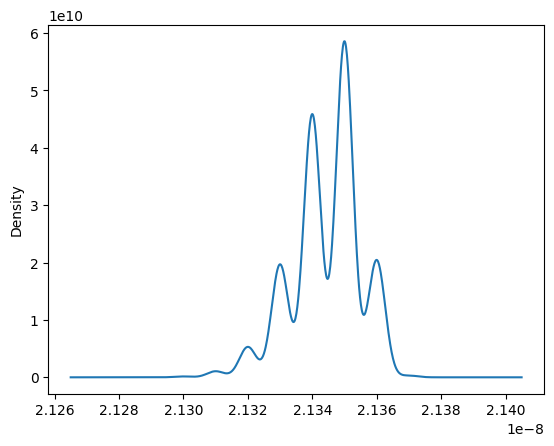

In [ ]:
Y.iloc[:,1].plot(kind='kde')

In [85]:
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)


np.random.seed(42)
random.seed(42)
# Dropping any rows with Nan values
x_ = X[:,4]
y_ = Y[:,4]
x_ = x_.reshape(-1,1)
y_ = y_.reshape(-1,1)

(1000, 100) (1000, 5)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.1)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

np.random.seed(69)
# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Square:', mean_squared_error(y_test, y_pred))
print('R2 Score:',regr.score(X_test, y_test))

Mean Square: 1.988048187519702e-20
R2 Score: 0.018683949099158936


In [91]:
from keras.models import Sequential , Model 
from keras.layers import Dense, Input, Activation
from tensorflow.keras.layers import LeakyReLU , ReLU

In [141]:
n1 = 10
n2 = 20

In [186]:
def run_regression(n_samples=1000):

    indices = random.sample(range(1000), n_samples)

    x_ = X[indices]
    y_ = Y[indices]

    training_input , testing_input, training_prediction , testing_prediction = train_test_split(x_, y_, test_size = .1)

    scaler = StandardScaler().fit(training_input)
    training_input = scaler.transform(training_input)
    testing_input = scaler.transform(testing_input)

    model =Sequential()

    model.add(Dense(n1, input_shape=(training_input.shape[1],)))  # first layer with input shape
    model.add(Dense(n2,))                                 

    model.add(Dense(5)) #output layer

    model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=tfa.metrics.r_square.RSquare())

    history = model.fit(training_input, training_prediction, epochs=50 , validation_data = (testing_input , testing_prediction), batch_size=8)

    return history

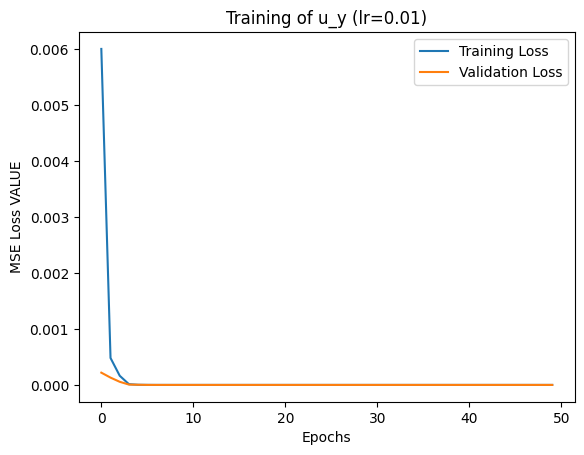

In [ ]:
history = run_regression()
plt.plot(history.history['loss'],label= 'Training Loss')
plt.plot(history.history['val_loss'],label= 'Validation Loss')
plt.title('Training of u_y (lr=0.01)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss VALUE')
plt.legend()

Classification

In [94]:
Y_ = Y - np.mean(Y, axis=0)
Y_[Y_>0] = 1
Y_[Y_<0] = 0

In [183]:
def run_classification(n_samples=1000):

    indices = random.sample(range(1000),100)

    x_ = X[indices]
    y_ = Y_[indices]

    training_input , testing_input, training_prediction , testing_prediction = train_test_split(x_, y_, test_size = .1)

    scaler = StandardScaler().fit(training_input)
    training_input = scaler.transform(training_input)
    testing_input = scaler.transform(testing_input)

    model =Sequential()

    model.add(Dense(n1, input_shape=(training_input.shape[1],)))  # first layer with input shape
    model.add(Dense(n2,))                        

    model.add(Dense(5)) #output layer
    model.add(Activation('sigmoid'))

    model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['categorical_accuracy'])

    history = model.fit(training_input, training_prediction, epochs=50 , validation_data = (testing_input , testing_prediction), batch_size=8)

    return history

100
Epoch 1/50
12/12 [==============================] - 2s 30ms/step - loss: 19176.6367 - r_square: -30426209131352293376.0000 - val_loss: 19028.6406 - val_r_square: -2782176919851649466368.0000
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 19006.0527 - r_square: 966155116997467176960.0000 - val_loss: 18909.2227 - val_r_square: -1160910679239569702912.0000
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 18807.8105 - r_square: 1504138380722032345088.0000 - val_loss: 18661.2812 - val_r_square: -614301263009985593344.0000
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 18397.5918 - r_square: 1044588752576589070336.0000 - val_loss: 18086.5352 - val_r_square: -360171580286769823744.0000
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 17544.3438 - r_square: 713579387251926761472.0000 - val_loss: 17111.3613 - val_r_square: -248726735360882638848.0000
Epoch 6/50
12/12 [==========================

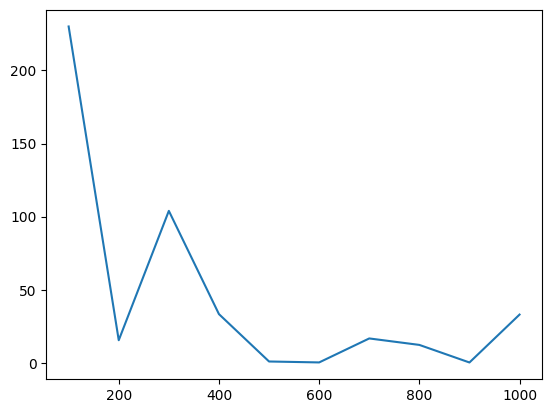

In [188]:
n_samples_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
losses_r = []
for n_samples in n_samples_list:
    print(n_samples)
    history_r = run_regression(n_samples)
    losses_r.append(history_r.history['loss'][-1])
plt.plot(n_samples_list, losses_r)
plt.show()

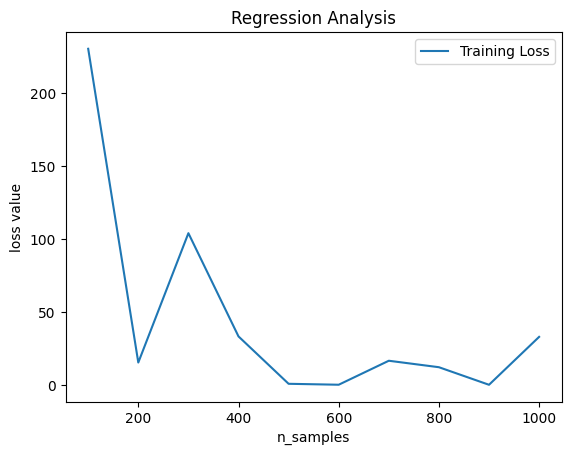

In [194]:
plt.plot(n_samples_list, losses_r, label='Training Loss')
plt.ylabel('loss value')
plt.xlabel('n_samples')
plt.title('Regression Analysis')
plt.legend()
plt.show()

100
Epoch 1/50
12/12 [==============================] - 1s 29ms/step - loss: 0.7870 - categorical_accuracy: 0.2667 - val_loss: 0.7562 - val_categorical_accuracy: 0.3000
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.4955 - categorical_accuracy: 0.4778 - val_loss: 0.7103 - val_categorical_accuracy: 0.2000
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.3593 - categorical_accuracy: 0.3889 - val_loss: 0.7357 - val_categorical_accuracy: 0.3000
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2466 - categorical_accuracy: 0.4222 - val_loss: 0.7757 - val_categorical_accuracy: 0.2000
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1580 - categorical_accuracy: 0.4111 - val_loss: 0.8188 - val_categorical_accuracy: 0.1000
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0976 - categorical_accuracy: 0.4333 - val_loss: 0.8894 - val_categorical_accuracy: 0.0000e+00
Epoch 7

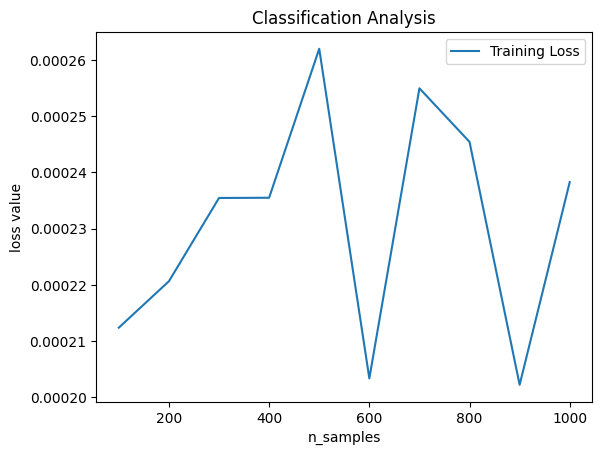

In [195]:
losses_c = []
for n_samples in n_samples_list:
    print(n_samples)
    history_c = run_classification(n_samples)
    losses_c.append(history_c.history['loss'][-1])
plt.plot(n_samples_list, losses_c, label='Training Loss')
plt.ylabel('loss value')
plt.xlabel('n_samples')
plt.title('Classification Analysis')
plt.legend()
plt.show()

In [179]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [180]:
history = model.fit(training_input, training_prediction, epochs=10 , validation_data = (testing_input , testing_prediction), batch_size=8)

Epoch 1/10
12/12 [==============================] - 1s 21ms/step - loss: 833.2781 - categorical_accuracy: 0.0000e+00 - val_loss: 834.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 833.2781 - categorical_accuracy: 0.0000e+00 - val_loss: 834.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 833.2781 - categorical_accuracy: 0.0000e+00 - val_loss: 834.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 833.2782 - categorical_accuracy: 0.0000e+00 - val_loss: 834.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 833.2782 - categorical_accuracy: 0.0000e+00 - val_loss: 834.1478 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 833.2782 - categorical_accuracy: 0.0000e+00 - v

In [178]:
print(history.history['loss'][-1])

833.2781982421875


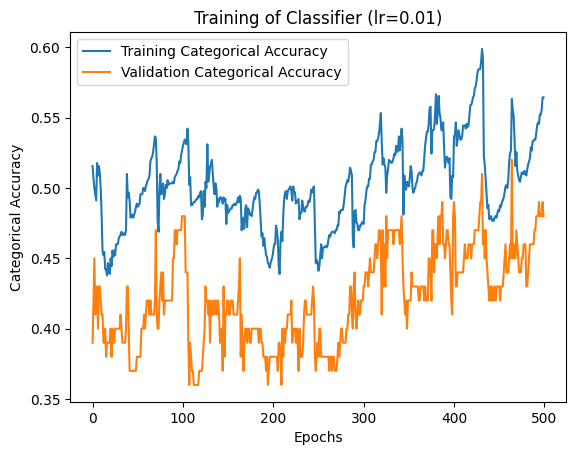

In [167]:
history = run_classification()
plt.plot(history.history['categorical_accuracy'],label= 'Training Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'],label= 'Validation Categorical Accuracy')
plt.title('Training of Classifier (lr=0.01)')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.legend()